### 💬 Question 1: Create and manipulate tensors in PyTorch  
（用 PyTorch 创建与操作张量）

**Description / 说明**  
This question tests your understanding of how to create, inspect, and transform tensors in PyTorch.  
题目考察你对 PyTorch 张量的创建、查看属性、以及基本算术操作的熟悉程度。

You should:  
1️⃣ Create a 3×3 tensor with random values.  
2️⃣ Print its shape and data type.  
3️⃣ Perform element-wise operations: add 2, then multiply by 3.  
4️⃣ Move it to GPU if available.  

**Mathematical Expression（数学表达）**  
Let \( x \in \mathbb{R}^{3 \times 3} \),  
then compute  

\[
x' = 3(x + 2)
\]

and move \( x' \) to CUDA device if available.


In [9]:
import torch

# 1️⃣ Create a random tensor (3x3)
x = torch.randn(3, 3)
print("Original tensor:\n", x)

# 2️⃣ Check shape and dtype
print("Shape:", x.shape)
print("Data type:", x.dtype)

# 3️⃣ Element-wise operations
x_transformed = 3 * (x + 2)
print("After transform:\n", x_transformed)

# 4️⃣ Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_gpu = x_transformed.to(device)
print(f"Tensor is on device: {x_gpu.device}")


Original tensor:
 tensor([[ 0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263],
        [-0.0085,  0.7291,  0.1331]])
Shape: torch.Size([3, 3])
Data type: torch.float32
After transform:
 tensor([[6.8446, 6.1685, 7.5681],
        [5.2849, 5.8503, 7.5790],
        [5.9745, 8.1872, 6.3994]])
Tensor is on device: cpu


### 💬 Question 2: Compute gradients using Autograd  
（使用自动求导计算梯度）

**Description / 说明**  
This question tests whether you understand PyTorch's automatic differentiation system.  
题目考察你对 PyTorch 自动求导机制的理解，包括 `requires_grad`、计算图、与 `.backward()` 的使用。

You should:  
1️⃣ Create a tensor \( x \) with `requires_grad=True`.  
2️⃣ Define a simple function \( y = x^2 + 2x + 3 \).  
3️⃣ Compute the gradient \( \frac{dy}{dx} \) using `.backward()`.  
4️⃣ Print the gradient and explain what happens when calling `.backward()`.

**Mathematical Expression（数学表达）**  

Let  

\[
y = x^2 + 2x + 3, \quad \text{then} \quad \frac{dy}{dx} = 2x + 2
\]


In [10]:
import torch

# 1️⃣ Create a tensor with gradient tracking
x = torch.tensor([3.0], requires_grad=True)

# 2️⃣ Define a simple function
y = x**2 + 2*x + 3

# 3️⃣ Perform backward pass (compute gradient)
y.backward()

# 4️⃣ Print gradient
print("x:", x)
print("y:", y)
print("dy/dx:", x.grad)


x: tensor([3.], requires_grad=True)
y: tensor([18.], grad_fn=<AddBackward0>)
dy/dx: tensor([8.])


### 💬 Question 3: Define a simple neural network using `nn.Module`  
（使用 `nn.Module` 定义一个简单的神经网络）

**Description / 说明**  
This question tests your understanding of how to define, initialize, and use neural network layers in PyTorch.  
题目考察你对 `torch.nn.Module` 的继承与使用、前向传播的定义方式、以及模块结构的理解。

You should:  
1️⃣ Create a custom model class inheriting from `nn.Module`.  
2️⃣ Define one fully connected layer (`nn.Linear`) with 2 inputs and 1 output.  
3️⃣ Implement the `forward()` method.  
4️⃣ Instantiate the model and perform a forward pass.

**Mathematical Expression（数学表达）**

For an input vector \( x \in \mathbb{R}^2 \),  
a linear layer computes:

\[
y = W x + b
\]

where \( W \in \mathbb{R}^{1 \times 2}, \; b \in \mathbb{R}^1
\]


In [13]:
import torch
import torch.nn as nn

# 1️⃣ Define custom model
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        # Linear layer: input_dim=2, output_dim=1
        self.linear = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        # forward pass
        y = self.linear(x)
        return y

# 2️⃣ Instantiate the model
model = SimpleLinearModel()
print(model)

# 3️⃣ Create fake input data
x = torch.tensor([[1.0, 2.0],
                  [2.0, 3.0],
                  [3.0, 4.0]])

# 4️⃣ Forward pass
output = model(x)
print("Model output:\n", output)


SimpleLinearModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Model output:
 tensor([[0.4981],
        [0.7594],
        [1.0208]], grad_fn=<AddmmBackward0>)


### 💬 Question 4: Use a loss function and optimizer to train a simple model  
（使用损失函数与优化器训练一个简单模型）

**Description / 说明**  
This question tests whether you understand how to:  
1️⃣ Define a loss function (e.g., MSELoss).  
2️⃣ Choose an optimizer (e.g., SGD).  
3️⃣ Perform a forward pass, compute loss, backpropagate, and update model parameters.  

题目考察你是否理解：  
- 损失函数如何衡量预测与真实值的差距  
- 优化器如何通过梯度下降更新参数  
- 整个训练步骤的标准流程：  
  **forward → loss → backward → step → zero_grad**

**Mathematical Expression（数学表达）**

Given model prediction \( \hat{y} = W x + b \),  
and target \( y \),  
the Mean Squared Error (MSE) loss is:

\[
\mathcal{L} = \frac{1}{N} \sum_i (\hat{y}_i - y_i)^2
\]

The parameters are updated via:

\[
\theta := \theta - \eta \, \nabla_\theta \mathcal{L}
\]
where \( \eta \) is the learning rate.


In [14]:
import torch
import torch.nn as nn

# 1️⃣ Define model
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)
    def forward(self, x):
        return self.linear(x)

# 2️⃣ Instantiate model, loss function, optimizer
model = SimpleLinearModel()
criterion = nn.MSELoss()                        # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 3️⃣ Fake data
x = torch.tensor([[1.0, 2.0],
                  [2.0, 3.0],
                  [3.0, 4.0]])
y_true = torch.tensor([[7.0],
                       [10.0],
                       [13.0]])  # roughly y = 2x1 + 3x2

# 4️⃣ Training step
for epoch in range(3):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y_true)

    # Backward pass
    optimizer.zero_grad()   # Clear previous gradients
    loss.backward()         # Compute gradients
    optimizer.step()        # Update parameters

    print(f"Epoch {epoch+1}: loss = {loss.item():.4f}")


Epoch 1: loss = 153.0644
Epoch 2: loss = 74.1903
Epoch 3: loss = 35.9860


### 💬 Question 5: Build and train a simple model on fake data  
（在随机生成的数据上训练一个简单模型）

**Description / 说明**  
This question tests whether you can integrate all PyTorch basics into a working training loop:  
题目考察你是否能把以下模块融会贯通：
- 生成假数据（输入特征和标签）
- 定义模型 (`nn.Module`)
- 定义损失函数和优化器
- 完成前向传播、反向传播和参数更新

**Mathematical Expression（数学表达）**

Suppose the true relationship between \(x_1, x_2\) and \(y\) is

\[
y = 2x_1 + 3x_2 + 1 + \epsilon
\]

where \(\epsilon\) is small Gaussian noise.  
The goal is for the model to learn weights close to 2 and 3, and bias ≈ 1.


In [ ]:
import torch
import torch.nn as nn

# 1️⃣ Generate fake data
torch.manual_seed(0)
N = 100   # number of samples
X = torch.randn(N, 2)                   # input features: shape [100, 2]
true_w = torch.tensor([[2.0, 3.0]])     # true weights
true_b = torch.tensor([1.0])            # true bias
y = X @ true_w.T + true_b + 0.1 * torch.randn(N, 1)  # add some noise

class SimpleLinear(nn.Module):
    def __init__(self):
        super(SimpleLinear, self).__init__()
        self.linear = nn.Linear(2, 1)
    def forward(self, x):
        return self.linear(x)

model = SimpleLinear()

# 3️⃣ Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# 4️⃣ Training loop
for epoch in range(50):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}")

# 5️⃣ Check learned parameters
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


Epoch [10/50], Loss: 1.4262
Epoch [20/50], Loss: 0.1522
Epoch [30/50], Loss: 0.0243
Epoch [40/50], Loss: 0.0109
Epoch [50/50], Loss: 0.0095
linear.weight: tensor([[2.0023, 3.0073]])
linear.bias: tensor([0.9919])


# 🧠 PyTorch 常见面试考点：模型评估与可视化 (Evaluation & Visualization)

---

## 💬 问题 (Question)

**Q:**  
What's the difference between `model.train()` and `model.eval()` in PyTorch,  
and how do you visualize training performance?

**问：**  
PyTorch 中 `model.train()` 和 `model.eval()` 有什么区别？  
如何在训练后进行模型评估与可视化？

---

## 🧩 讲解 (Explanation)

### 🟢 `model.train()`
- 启用训练模式（默认模式）
- 激活 dropout、batch normalization 等在训练时行为不同的层
- 会记录梯度（可进行反向传播）

### 🔵 `model.eval()`
- 切换到推理（评估）模式
- 停用 dropout、batchnorm 中的随机性
- 通常与 `torch.no_grad()` 一起用来避免计算梯度、节省内存：

```python
model.eval()
with torch.no_grad():
    y_pred = model(x_test)


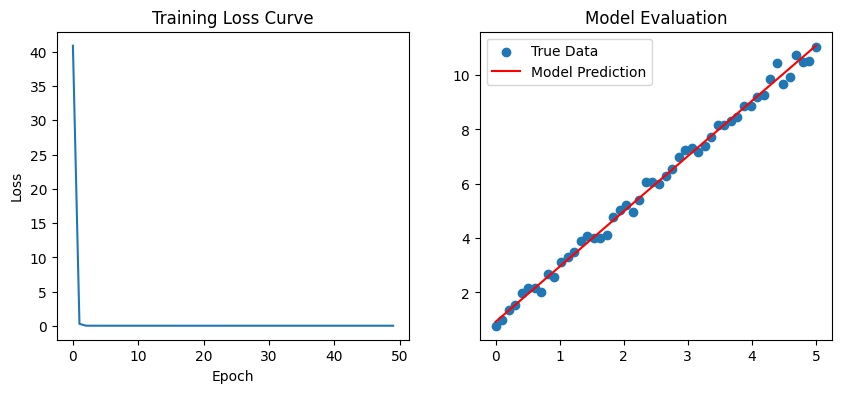

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1️⃣ 假设一个简单的模型
class SimpleLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

# 2️⃣ 生成假数据
torch.manual_seed(0)
x = torch.linspace(0, 5, 50).unsqueeze(1)
y_true = 2 * x + 1 + 0.2 * torch.randn_like(x)

# 3️⃣ 训练模型
model = SimpleLinear()
#momentum is a parameter that helps the optimizer to converge faster and more stably
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
criterion = nn.MSELoss()

losses = []
for epoch in range(50):
    model.train()  # 训练模式
    y_pred = model(x)
    loss = criterion(y_pred, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

# 4️⃣ 评估阶段
model.eval()
with torch.no_grad():
    y_eval = model(x)

# 5️⃣ 可视化
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.scatter(x.numpy(), y_true.numpy(), label="True Data")
plt.plot(x.numpy(), y_eval.numpy(), 'r', label="Model Prediction")
plt.legend()
plt.title("Model Evaluation")
plt.show()


# 🧠 PyTorch 常见函数与损失函数 · 公式与手写实现合集

> 说明：本文件为标准 Markdown（支持 LaTeX 数学公式）。可直接保存为 `.md`。

---

## 🔹 1. ReLU（Rectified Linear Unit）

**定义**

$$
\mathrm{ReLU}(x)=\max(0,x)
$$

**导数**

$$
\frac{d}{dx}\mathrm{ReLU}(x)=
\begin{cases}
1, & x>0\\\\
0, & x\le 0
\end{cases}
$$

---

## 🔹 2. Sigmoid（Logistic）

**定义**

$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$

**导数**

$$
\sigma'(x)=\sigma(x)\bigl(1-\sigma(x)\bigr)
$$

---

## 🔹 3. Tanh（双曲正切）

**定义**

$$
\tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

**导数**

$$
\frac{d}{dx}\tanh(x)=1-\tanh^2(x)
$$

---

## 🔹 4. Softmax（多分类归一化）

**定义**

$$
\mathrm{Softmax}(z)_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}
$$

**雅可比（导数）**

$$
\frac{\partial\,\mathrm{Softmax}(z)_i}{\partial z_j}
=\mathrm{Softmax}(z)_i\bigl(\delta_{ij}-\mathrm{Softmax}(z)_j\bigr)
$$

---

## 🔹 5. Cross-Entropy（交叉熵损失）

**定义（与 Softmax 搭配）**

$$
\mathcal{L}_{CE}=-\sum_{i=1}^{K}y_i\log \hat y_i, \quad \hat y=\mathrm{Softmax}(z)
$$

---

## 🔹 6. MSE（均方误差）

**定义**

$$
\mathcal{L}_{MSE}=\frac{1}{N}\sum_{i=1}^{N}(\hat y_i-y_i)^2
$$

**对 \(\hat y_i\) 的导数**

$$
\frac{\partial \mathcal{L}}{\partial \hat y_i}=\frac{2}{N}(\hat y_i-y_i)
$$

---

## 🔹 7. L1（平均绝对误差）

**定义**

$$
\mathcal{L}_{L1}=\frac{1}{N}\sum_{i=1}^{N}\lvert \hat y_i-y_i\rvert
$$

**对 \(\hat y_i\) 的（次）梯度**

$$
\frac{\partial \mathcal{L}}{\partial \hat y_i}=
\begin{cases}
\frac{1}{N}, & \hat y_i>y_i\\\\
-\frac{1}{N}, & \hat y_i<y_i
\end{cases}
\quad(\hat y_i=y_i\ \text{处取次梯度})
$$

---

## 🔹 8. Leaky ReLU

**定义（\(\alpha\in(0,1)\)）**

$$
f(x)=
\begin{cases}
x, & x>0\\\\
\alpha x, & x\le 0
\end{cases}
$$

**导数**

$$
f'(x)=
\begin{cases}
1, & x>0\\\\
\alpha, & x\le 0
\end{cases}
$$

---

## 🔹（常用）Softmax + CrossEntropy 的 logits 梯度

设 \(\hat y=\mathrm{Softmax}(z)\)，\(\mathcal{L}=-\sum_i y_i\log \hat y_i\)，则

$$
\frac{\partial \mathcal{L}}{\partial z_i}=\hat y_i-y_i
$$

---

In [ ]:
import torch

# =========================================================
# 1️⃣ ReLU (Rectified Linear Unit)
# ---------------------------------------------------------
# 👉 Purpose:
#     Introduce non-linearity; allow only positive activations to pass.
# 👉 Design idea:
#     - Keep positive values (let signal flow)
#     - Clip negatives to zero (prevent exploding gradient)
# 👉 Pros:
#     - Computationally cheap
#     - Reduces vanishing gradient issue
# 👉 Cons:
#     - "Dead neuron" problem when x < 0 (gradient = 0)
# ---------------------------------------------------------
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

def relu_derivative(x):
    # Derivative: 1 if x > 0, else 0
    return (x > 0).float()


# =========================================================
# 2️⃣ Sigmoid (Logistic Function)
# ---------------------------------------------------------
# 👉 Purpose:
#     Map input to range (0, 1) — often used for probabilities.
# 👉 Design idea:
#     - Smooth non-linearity
#     - Good for binary classification outputs
# 👉 Pros:
#     - Intuitive probabilistic interpretation
# 👉 Cons:
#     - Saturates for large |x| (vanishing gradient)
#     - Non zero-centered output (can slow learning)
# ---------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_derivative(x):
    # Derivative: σ'(x) = σ(x) * (1 - σ(x))
    s = sigmoid(x)
    return s * (1 - s)


# =========================================================
# 3️⃣ Tanh (Hyperbolic Tangent)
# ---------------------------------------------------------
# 👉 Purpose:
#     Map input to (-1, 1), zero-centered output.
# 👉 Design idea:
#     - Similar to sigmoid but symmetric around 0
#     - Helps gradients flow better
# 👉 Pros:
#     - Zero-centered output, often faster convergence
# 👉 Cons:
#     - Still suffers from vanishing gradient for large |x|
# ---------------------------------------------------------
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

def tanh_derivative(x):
    # Derivative: 1 - tanh^2(x)
    t = tanh(x)
    return 1 - t**2


# =========================================================
# 4️⃣ Softmax
# ---------------------------------------------------------
# 👉 Purpose:
#     Convert a vector into a probability distribution.
# 👉 Design idea:
#     - Exponentiate and normalize so outputs sum to 1
#     - Emphasizes the largest values
# 👉 Used in:
#     - Multi-class classification output layers
# ---------------------------------------------------------
def softmax(x):
    # Subtract max(x) for numerical stability
    exps = torch.exp(x - torch.max(x))
    return exps / torch.sum(exps)


# =========================================================
# 5️⃣ Cross-Entropy Loss
# ---------------------------------------------------------
# 👉 Purpose:
#     Measure the difference between two probability distributions.
# 👉 Design idea:
#     - Penalizes incorrect confident predictions heavily
#     - Encourages predicted probabilities to match true labels
# 👉 Commonly used for:
#     - Classification tasks (with Softmax)
# ---------------------------------------------------------
def cross_entropy(pred, target):
    # pred: predicted probabilities (after softmax)
    # target: true labels (one-hot encoded)
    # Add small epsilon (1e-9) to avoid log(0)
    return -torch.sum(target * torch.log(pred + 1e-9))


# =========================================================
# 6️⃣ Mean Squared Error (MSE)
# ---------------------------------------------------------
# 👉 Purpose:
#     Measure the average squared difference between prediction and truth.
# 👉 Design idea:
#     - Punish large errors quadratically
#     - Common in regression problems
# 👉 Pros:
#     - Smooth, differentiable
# 👉 Cons:
#     - Sensitive to outliers
# ---------------------------------------------------------
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)


# =========================================================
# 7️⃣ L1 Loss (Mean Absolute Error)
# ---------------------------------------------------------
# 👉 Purpose:
#     Measure average absolute difference between prediction and truth.
# 👉 Design idea:
#     - More robust to outliers than MSE
# 👉 Used in:
#     - Sparse regression (Lasso)
#     - When you want robust models against noise
# ---------------------------------------------------------
def l1_loss(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))


# =========================================================
# 8️⃣ Leaky ReLU
# ---------------------------------------------------------
# 👉 Purpose:
#     Fix ReLU’s "dead neuron" issue by allowing a small slope when x < 0.
# 👉 Design idea:
#     - Let negative values pass with small α (e.g. 0.01)
# 👉 Pros:
#     - Keeps gradient non-zero for negative region
# 👉 Common use:
#     - Deep networks, GANs, when ReLU causes dead units
# ---------------------------------------------------------
def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    # Derivative: 1 if x > 0 else α
    return torch.where(x > 0, torch.tensor(1.0), torch.tensor(alpha))

x: tensor([-2., -1.,  0.,  1.,  2.])
ReLU: tensor([0., 0., 0., 1., 2.])
LeakyReLU: tensor([-0.0200, -0.0100,  0.0000,  1.0000,  2.0000])
Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])
Softmax: tensor([0.6590, 0.2424, 0.0986])
CrossEntropy: tensor(0.4170)
